# Cross Validation and Simple Linear Regression

This is the process that gives us the internal and the cross-validation measures of <b> predictive accuracy </b>for a <b>simple linear regression</b>. The data are <b>randomly assigned</b> to a number of "folds", which in our context is the <b>test</b> and <b>training</b> folds. Each fold is removed, in turn, while the <b>remaining data</b> is used to <b>re-fit</b> the regression model and to <b>predict</b> at the <b>deleted observations.</b>

- We will predict employee salaries from different employee characteristics (or features). <br> 
- We are going to use a simple supervised learning technique: linear regression. 
- We want to build a simple model to determine how well Years Worked predicts an employee’s salary. Years Worked predicts an employee’s salary.

## 1. Importing

In [27]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets, linear_model
from scipy.stats import iqr
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt

from pandas import Series
from numpy.random import randn

ImportError: cannot import name 'rmse' from 'sklearn.metrics' (C:\Users\Mc Camel RT .LAPTOP-6N3UDB08\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
# Reading data into a dataframe
salary = pd.read_csv('salary (1).csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


<h1><center>Type of data</center></h1> 

| Continuous | Categorical | Binary |
| --- | --- | --- |
| Salary | position | degree |
| exprior | field | otherqual |
| Yearsworked | - | male |
| market | - | - |
| yearsranked | - | -|
| yearsabs | - | - |

<h1><center>Feature description</center></h1> 

| Feature | Description |
| --- | --- |
| exprior | Years of experience prior to working in this field |
| Yearsworked | Years worked in this field |
| yearsrank | Years worked at current rank |
| market | Market value (1 = salary at market value for position, <br> <1 salary lower than market value for position,<br> >1 salary higher than market value for position) |
| degree | Has degree (0 = no 1= yes) |
| otherqual | Has other post-secondary qualification (0 = no, 1=yes) |
| position | Position (1 = Junior Employee 2=Manager 3= Executive) |
| male | 0 = no 1 1=yes |
| Field | Field of work (1 = Engineering 2=Finance 3=Human Resource 4=Marketing) |
| yearsabs |Years absent from work (e.g. due to illness / child rearing / personal reasons)|

<h1><center>Response description</center></h1> 

| Response | Description |
| --- | --- |
| <font color='black'> salary </font>| <font color='black'>  Annual salary in dollars </font> | 

## 2. Cleaning data
Data cleaning is the process of detecting and correcting corrupt or inaccurate data from a dataset, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
### 2.1 Examining missing values

In [3]:
#Checking for missing values for our dataset

salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [4]:
#Filling the missing values with the average
salary = salary.fillna(salary['salary'].mean())
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


##### What we did with the missing values in the data

- We <b>filled</b> the missing value that appeared in the <b>salary</b> column with the <b>mean</b> of that column.

### 2.2 Examing duplicates within the dataset

In [5]:
#Dropping duplicates within the dataset
salary.drop_duplicates(inplace=True)

##### Dealing with duplicates within the dataset

We dropped any duplicates that may exist within the dataset

### 2.3 Examining outliers within the dataset
In statistics, an outlier is an observation point that is distant from other observations.


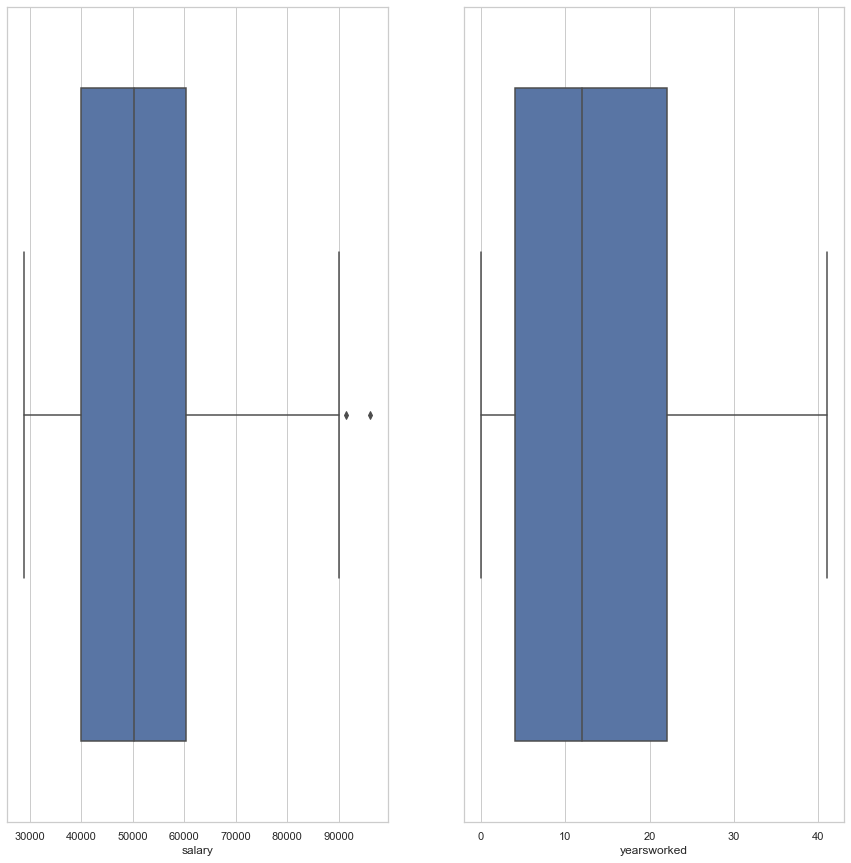

In [6]:
#Checking for extreme values
sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2, figsize=(15, 15))
sns.boxplot(x=salary["salary"], ax=axes[0], data = salary)
sns.boxplot(x=salary["yearsworked"], ax=axes[1],data = salary)


In [7]:
#Removing the outliers
removed_outliers = salary['salary'].between(salary['salary'].quantile(.05), salary['salary'].quantile(.95))


##### Outliers

Using the box plot method have observed <b> two outliers</b> for the salary values, and <b>none</b> for the yearsworked values. 
How we intend on dealing with the outliers is to <b>remove </b> them, so that the model that we will build will not be affected.

## 3. Spliting data
These are two rather important concepts in data science and data analysis and are used as tools to prevent (or at least minimize) overfitting. We usually fit the model on a training set in order to make predications on a data that wasn’t trained (general data)

In [8]:
#Split our data
x = salary[['exprior','yearsworked','yearsrank','market','degree','otherqual','position', 'male','Field','yearsabs']]
y = salary['salary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
y_train = pd.DataFrame(y_train)

### 3.1 Viewing the split data

In [10]:
#showcasing the first 5 observations of the feature variables
X_train.head()


,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
324,21,5,5,0.92,1,0,2,1,4,0
233,1,21,11,0.99,1,0,3,1,1,0
8,0,2,1,0.85,1,0,1,1,1,1
462,0,12,11,0.88,1,0,1,0,4,30
426,3,2,2,0.85,1,0,1,0,3,0


In [11]:
#showcasing the first 5 observations of the response variable (salary)
y_train.head()

,salary
324,41045.0
233,60717.0
8,36308.0
462,40636.0
426,39461.0


In [12]:
#Describing the dataset of the response variable (salary)
y_train.describe()


,salary
count,411.000000
mean,50722.844919
std,12715.740651
min,29000.000000
25%,39986.000000
50%,49252.000000
75%,60412.500000
max,96156.000000


In [13]:
#Describing the dataset of the feature variables
X_train.describe()


,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,411.000000,411.00000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,2.836983,12.83455,6.929440,0.947007,0.968370,0.038929,2.128954,0.749392,2.506083,7.330900
std,4.637619,9.36766,6.382322,0.150307,0.175227,0.193663,0.817738,0.433891,1.122644,17.465017
min,0.000000,0.00000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,4.00000,2.000000,0.840000,1.000000,0.000000,1.000000,0.500000,1.000000,0.000000
50%,0.000000,12.00000,4.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,4.000000,22.00000,11.000000,1.020000,1.000000,0.000000,3.000000,1.000000,3.500000,2.000000
max,23.000000,41.00000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


### Describing the datasets
 - The training dataset contains <b> 80% of the overall dataset </b> and has been divided into two datasets the <b>feautures dataset </b> and the <b>response variable dataset</b>
 
 

## 4. Distribution of the data
The distribution of a statistical data set (or a population) is a listing or function showing all the possible values (or intervals) of the data and how often they occur.

### 4.1 Histograms of salaries and years worked 

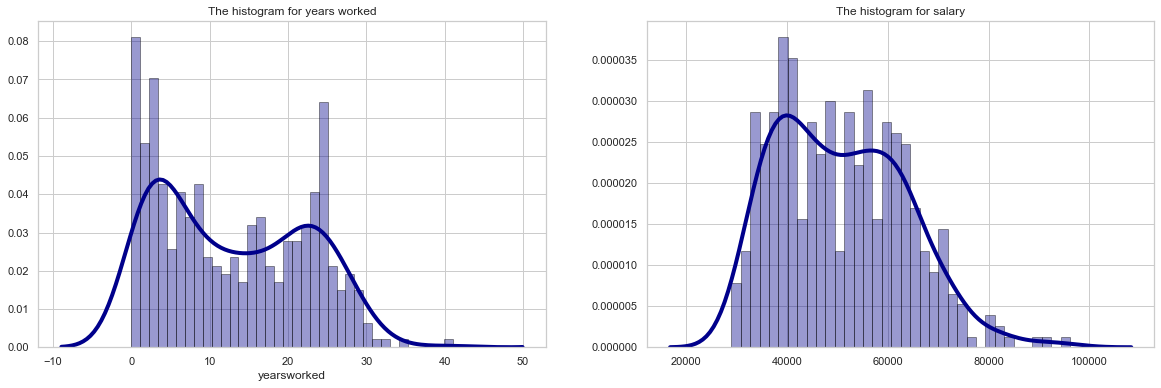

In [14]:
#Creating histograms with density line

sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2,figsize=(20, 6))
sns.distplot(X_train["yearsworked"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0])

sns.distplot(y_train, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1])

axes[0].set_title('The histogram for years worked')
axes[1].set_title('The histogram for salary')
plt.show()

### 4.2 Scatterplot of salary and years worked

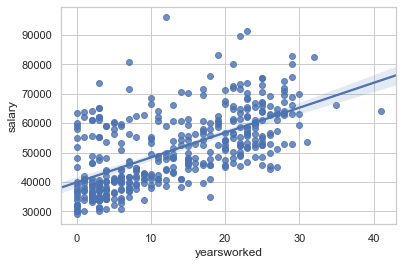

In [15]:
#Creating scatterplot
combined = pd.concat([X_train, y_train], axis=1)
combined.head()
sns.regplot(x=combined['yearsworked'], y=combined['salary'])


##### Distribution of the salary and number of years worked
- Both graphs show a distribution that is not normal, they are both skewed to the right
- The salary distribution graph shows that there are more people earning between 35 000 dollars and 60 000 dollars and fewer people earning more than 75 000 dollars
- The number of years worked distribution graph shows that more people have worked within the years 0 to 26 years whereas the least have worked greater than 30 years

##### Scatter plot of the salary vs number of years worked

The <b> line of best fit </b> shows a <b>strong positive relationship</b> between years worked and the salary earned. which implies that when the number of years worked <b> increases </b> the salary inturn also <b> increase </b>

## 5. Modeling
### 5.1 Simple linear regression model using statsmodels 

In [16]:
# Fit regression model 
results = smf.ols('salary ~ yearsworked', data=combined).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     260.5
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           1.07e-45
Time:                        23:17:59   Log-Likelihood:                -4365.6
No. Observations:                 411   AIC:                             8735.
Df Residuals:                     409   BIC:                             8743.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.986e+04    833.214     47.833      

### 5.2 Analysis of the model

##### 5.2.1 Does the model significantly predict the dependent variable? 

<b> According to the R-squared criterion:</b>
- Because there is only one feature variable modelled, we can either use the R-squared or the adjusted R-squared as the adjusted R-sqaured helps us with penalizing the R-squared for every variable inputed into the model.
- R-sqaured = 0.377 and adjusted R-squared = 0.376
  - So we can sonclude that the salary response variable is explained by 37% of the feauture variable which is number of years worked.
  

<b>According to the pvalue criterion: </b> <br>
H0: Does not have signficant relationship <br>
Ha: Has significant relationship
-  The pvalue given in the OLS is 0, and this is less than the significance level of 5%. Therefore we reject the null hypothesis stating that there is no evident relationship between the predictor and the response variable.



#####  5.2.2 What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked
- The graph shows that about 37% of the data fits the regression model.

##### 5.2.3 Interpretation of coeficients

<b> Intercept: </b> 
- The coefficient for number of years worked is 40570
  - That is, if the number of years worked is 0, the base salary will be $40570 

<b> Number of years worked: </b> 
- The coefficient for number of years worked is 819.77
  - That is, if the number of years worked increased by one unit, the salary will then increase by $819.77



##### 5.2.4 Confidence intervals

- A 95% confidence interval is a range of values that you can be 95% certain that it contains the true mean of the population. Idealy, with regards to the interval,the true population mean value should be on that interval. If a confidence interval does not include a particular value, we can say that it is not likely that the particular value is the true population mean. However, even if a particular value is within the interval, we shouldn't conclude that the population mean equals that specific value.

- The confidence interval can also be used for coefficients of the regression model Use the confidence interval to assess the estimate of the population coefficient for each term in the model.


##### 5.2.4 What do the 95% confidence intervals [0.025, 0.975] mean?

You can be 95% confident that the confidence interval contains the value of the coefficient for the population.


### 5.3 Predictions 

In [17]:
#Calculate expected salary for someone who worked for 12 years

year_12 = pd.DataFrame({'yearsworked':[12]})
prints = results.predict(year_12)
p=prints.iloc[0]
p


50016.19645323409

In [18]:
# if combined.yearsworked == 12: return combined[combined.salary[i]] for i in combined

year_12 = pd.DataFrame(combined[combined.yearsworked == 12]['salary'])
year_12.sort_values(by=['salary'])

,salary
456,38572.00000
462,40636.00000
476,43958.00000
493,44410.85547
479,47661.00000
128,48941.00000
122,49667.00000
123,58949.00000
377,96156.00000


In [19]:
#Calculate expected salary for someone who worked for 80 years
year_12 = pd.DataFrame({'yearsworked':[80]})
prints = results.predict(year_12)
p=prints.iloc[0]
p

107594.6551238269

In [20]:
# if combined.yearsworked == 80: return combined[combined.salary[i]] for i in combined

year_80 = pd.DataFrame(combined[combined.yearsworked == 80]['salary'])
year_80.sort_values(by=['salary'])

,salary


#### Are there any problems with this prediction? If so, what are they?

- There was no problem in predicting the salary for the 12 years worked as 12 years is within the range of our dataset (Interpolation).
- The problem comes into play when we are predicting for the 80 years worked as this is not within the range (extrapolation)
- The disadvantage of predicting on extrapolated data is that it is unreliable if there are significant fluctuations in historical data. Assumes past trend will continue into the future – unlikely in many competitive business environments

## 6. Correlation
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

### 6.1 Correlation Matrix



In [21]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = combined.corr()
corr.style.background_gradient(cmap='coolwarm')

,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,salary
exprior,1,-0.249726,-0.0733161,-0.0555306,-0.0483799,0.25964,0.079518,0.0123747,-0.0595386,0.160657,0.0807986
yearsworked,-0.249726,1,0.802567,-0.0724999,0.0161206,-0.00585205,0.743705,0.271208,-0.248989,0.0644095,0.623793
yearsrank,-0.0733161,0.802567,1,-0.0183231,0.00672314,0.0259073,0.45459,0.231403,-0.275838,0.0381299,0.602534
market,-0.0555306,-0.0724999,-0.0183231,1,0.0584428,-0.0244764,-0.0184821,0.205384,-0.21432,-0.177073,0.41084
degree,-0.0483799,0.0161206,0.00672314,0.0584428,1,-0.251121,0.0455567,0.0238063,-0.0796107,0.0353075,0.0546875
otherqual,0.25964,-0.00585205,0.0259073,-0.0244764,-0.251121,1,0.183841,0.000282493,-0.0908385,0.00555658,0.177653
position,0.079518,0.743705,0.45459,-0.0184821,0.0455567,0.183841,1,0.290656,-0.283806,0.0390164,0.694746
male,0.0123747,0.271208,0.231403,0.205384,0.0238063,0.000282493,0.290656,1,-0.119539,-0.62599,0.357847
Field,-0.0595386,-0.248989,-0.275838,-0.21432,-0.0796107,-0.0908385,-0.283806,-0.119539,1,-0.019011,-0.488979
yearsabs,0.160657,0.0644095,0.0381299,-0.177073,0.0353075,0.00555658,0.0390164,-0.62599,-0.019011,1,-0.0671651


### 6.2 Correlation heat map

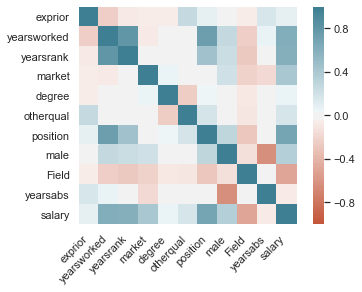

In [22]:
correlation = combined.corr()

ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

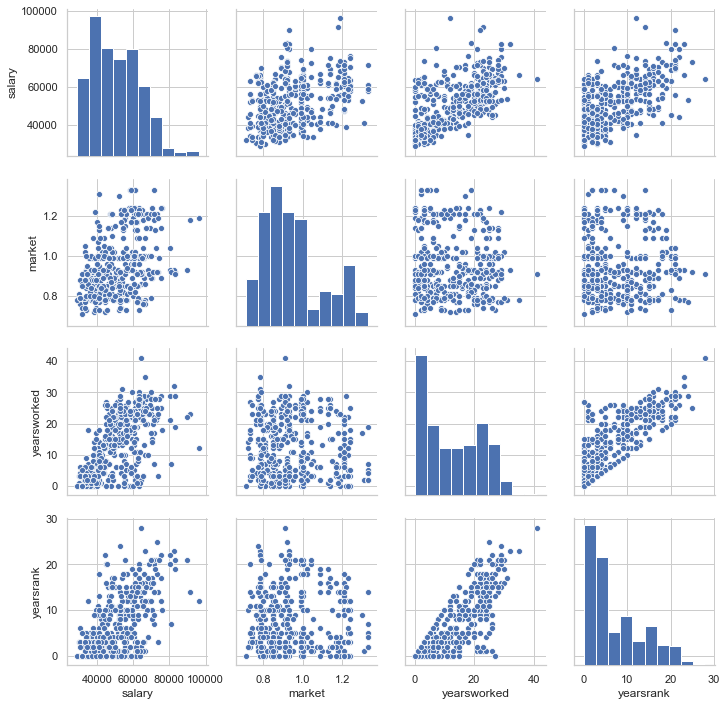

In [23]:
salary_corr = combined[['salary', 'market', 'yearsworked', 'yearsrank']]

sns.pairplot(salary_corr)
plt.show()

### Interpreting correlation graph

- The above table shows the correlation between two variables, showcasing its <b>strengths and direction</b>. This helps us to select the features that have a significant impact on the response variable and therefore helping us predict the salaries.

- looking at the correlation between the response variable Salary and the feature variable yearsworked which is <b>0.623589</b>. This is a <b> fairly strong positive relationship </b>, and therefore we can assume as the number of years worked increases the value of salary also increases.

#### We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

Looking at the the correlation matrix, the features that have good correlation with salary are yearsrank, position and field. The rest of the features have less than 50% correlation with salary.

## 7. RSME
Root mean squared error (RMSE): RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average squared differences between prediction and actual observation.


In [ ]:
test_preds= results.predict(results.X_train)
rmse_train= rmse(combine.salary, results)
rmse_test= rmse(combine.salary, test_preds)
print(f'The rmse  for the train set is {rmse_train}')
print(f'The rmse  for the test set is {rmse_test}')
print(f'the difference in RMSE between training and testing is {rmse_test- rmse_train}')

In [ ]:
rmse(y_train,results.predict(X_train))
rmse_train=rmse(y_train, results.predict(X_train))
rmse_test=rmse(y_train, results.predict(X_train))
print('The rmse  for the train set is :' ,rmse_train)
print('The rmse  for the test set is :',rmse_test)
print('the difference in RMSE between training and testing is:', rmse_test - rmse_train)

##### What is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

Our model performs better on the train dataset than it does on the test set. With this we can now conclude that the model is overfitted. We say this because our model shows low bias but high variance. To better train our model we need to identify relevant variables and terms that you are likely to influence our outcome that we hoping f

In [ ]:
linreg = LinearRegression()


In [ ]:
linreg.fit(X_train,y_train)

In [ ]:
#predictions for test
pred_test =linreg.predict(X_test)
#predictions for train
pred_train =linreg.predict(X_train)

In [ ]:
#Mean square Error of the test
MSE_test = mean_squared_error(y_test,pred_test)
MSE_test

In [ ]:
#Mean square Error of the train
MSE_train = mean_squared_error(y_train,pred_train)
MSE_train

In [ ]:
#root mean square error of the test dataset
RMSE_test = sqrt(MSE_test)
RMSE_test


In [ ]:
RMSE_train = sqrt(MSE_train)
RMSE_train


RMSE_train is bigger than  RMSE_test by slight margin therefore there is overfitting on our model.